# Regressao Linear - Açudes da Paraíba 
## Época da seca - até Março 2017 - Boqueirão
### http://www.aesa.pb.gov.br/aesa-website/monitoramento/
#### http://www.aesa.pb.gov.br/aesa-website/monitoramento/volume-acude/?id_acude=531
#### http://www.aesa.pb.gov.br/aesa-website/monitoramento/volume-diario/?tipo=atual

## Nome: Matricula - Nome do Açude

In [3]:
import pandas as pd

## Leitura do dataset
## Acude de Boqueirão - Previsão de Seca - 31/01/2008 ate 31/03/2017

In [4]:
!ls *.xlsx

boqueirao-2017-2018.xlsx  boqueiraoRecarga2018.xlsx
boqueirao20172018.xlsx	  boqueirao_sem_recarga3.xlsx


In [5]:
# Acude de Boqueirão com Recarga do Rio São Francisco - 31/01/2008 ate 31/03/2017
df = pd.read_excel(open("boqueirao_sem_recarga3.xlsx",'rb'))
df.head()

,Açude,Data do registro,Volume (%),Volume (m³),Volume de chuvas (mm)
0,Epitácio Pessoa,31/01/2008,67.39,2.774251e+08,0
1,Epitácio Pessoa,29/02/2008,65.23,2.685472e+08,0
2,Epitácio Pessoa,31/03/2008,110.03,4.529657e+08,0
3,Epitácio Pessoa,30/04/2008,104.93,4.319852e+08,0
4,Epitácio Pessoa,31/05/2008,104.83,4.315656e+08,0


In [6]:
df.tail()

,Açude,Data do registro,Volume (%),Volume (m³),Volume de chuvas (mm)
106,Epitácio Pessoa,30/11/2016,5.39,22196764.40,0
107,Epitácio Pessoa,31/12/2016,4.82,19828074.48,0
108,Epitácio Pessoa,31/01/2017,4.21,17343204.52,0
109,Epitácio Pessoa,28/02/2017,3.72,15312655.88,0
110,Epitácio Pessoa,31/03/2017,3.18,13094571.31,0


In [8]:
pd.options.display.float_format = '{:.2f}'.format
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Volume (%),111.00,59.71,35.52,3.18,23.64,67.39,90.15,110.03
Volume (m³),111.00,245819349.79,146231793.74,13094571.31,97312900.20,277425076.80,371129514.49,452965706.59
Volume de chuvas (mm),111.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
#!ls -ilah *.csv

In [ ]:
!pwd

In [ ]:
#!dir *.csv

In [ ]:
# #import pandas as pd
# file = '/home/valencar/Downloads/' + 'coremas.csv'
# df = pd.read_csv(file)
# df.head()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Açude                  111 non-null    object 
 1   Data do registro       111 non-null    object 
 2   Volume (%)             111 non-null    float64
 3   Volume (m³)            111 non-null    float64
 4   Volume de chuvas (mm)  111 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 4.5+ KB


In [ ]:
#df['volume'] = df['Volume (%)'].apply(lambda x : float ( x.replace(',','.') ) )
#df.head()

In [10]:
df = df[ ['Data do registro', 'Volume (%)'] ].copy()
df.head(10)

,Data do registro,Volume (%)
0,31/01/2008,67.39
1,29/02/2008,65.23
2,31/03/2008,110.03
3,30/04/2008,104.93
4,31/05/2008,104.83
5,30/06/2008,102.16
6,31/07/2008,100.78
7,31/08/2008,99.05
8,30/09/2008,96.67
9,31/10/2008,94.00


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Data do registro  111 non-null    object 
 1   Volume (%)        111 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.9+ KB


In [12]:
df.head()

,Data do registro,Volume (%)
0,31/01/2008,67.39
1,29/02/2008,65.23
2,31/03/2008,110.03
3,30/04/2008,104.93
4,31/05/2008,104.83


In [13]:
# converter atributo para data
df['Data do registro'] =  pd.to_datetime( df['Data do registro'], format="%d/%m/%Y") 
df.head()

,Data do registro,Volume (%)
0,2008-01-31,67.39
1,2008-02-29,65.23
2,2008-03-31,110.03
3,2008-04-30,104.93
4,2008-05-31,104.83


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Data do registro  111 non-null    datetime64[ns]
 1   Volume (%)        111 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.9 KB


In [15]:
# colocar a data como indice para fazer uma série temporal
df2 = df.set_index(pd.DatetimeIndex(df['Data do registro']))
del df2['Data do registro']
df2.head()

,Volume (%)
Data do registro,
2008-01-31,67.39
2008-02-29,65.23
2008-03-31,110.03
2008-04-30,104.93
2008-05-31,104.83


In [16]:
#del df2["Açude"]
df2.describe()

,Volume (%)
count,111.00
mean,59.71
std,35.52
min,3.18
25%,23.64
50%,67.39
75%,90.15
max,110.03


In [ ]:
df2.info()

In [17]:
df2.head()

,Volume (%)
Data do registro,
2008-01-31,67.39
2008-02-29,65.23
2008-03-31,110.03
2008-04-30,104.93
2008-05-31,104.83


In [18]:
dfmaior_100 = df2[ df2['Volume (%)'] > 100]
dfmaior_100

,Volume (%)
Data do registro,
2008-03-31,110.03
2008-04-30,104.93
2008-05-31,104.83
2008-06-30,102.16
2008-07-31,100.78
2009-05-31,109.82
2009-06-30,104.03
2009-07-31,102.94
2009-08-31,101.37


In [19]:
df2['Volume (%)'] = df2['Volume (%)'].apply(lambda x: 100.0 if x > 100.0 else x)
df2.head()

,Volume (%)
Data do registro,
2008-01-31,67.39
2008-02-29,65.23
2008-03-31,100.00
2008-04-30,100.00
2008-05-31,100.00


In [20]:
type(df2)

pandas.core.frame.DataFrame

## Plota dados da época da seca

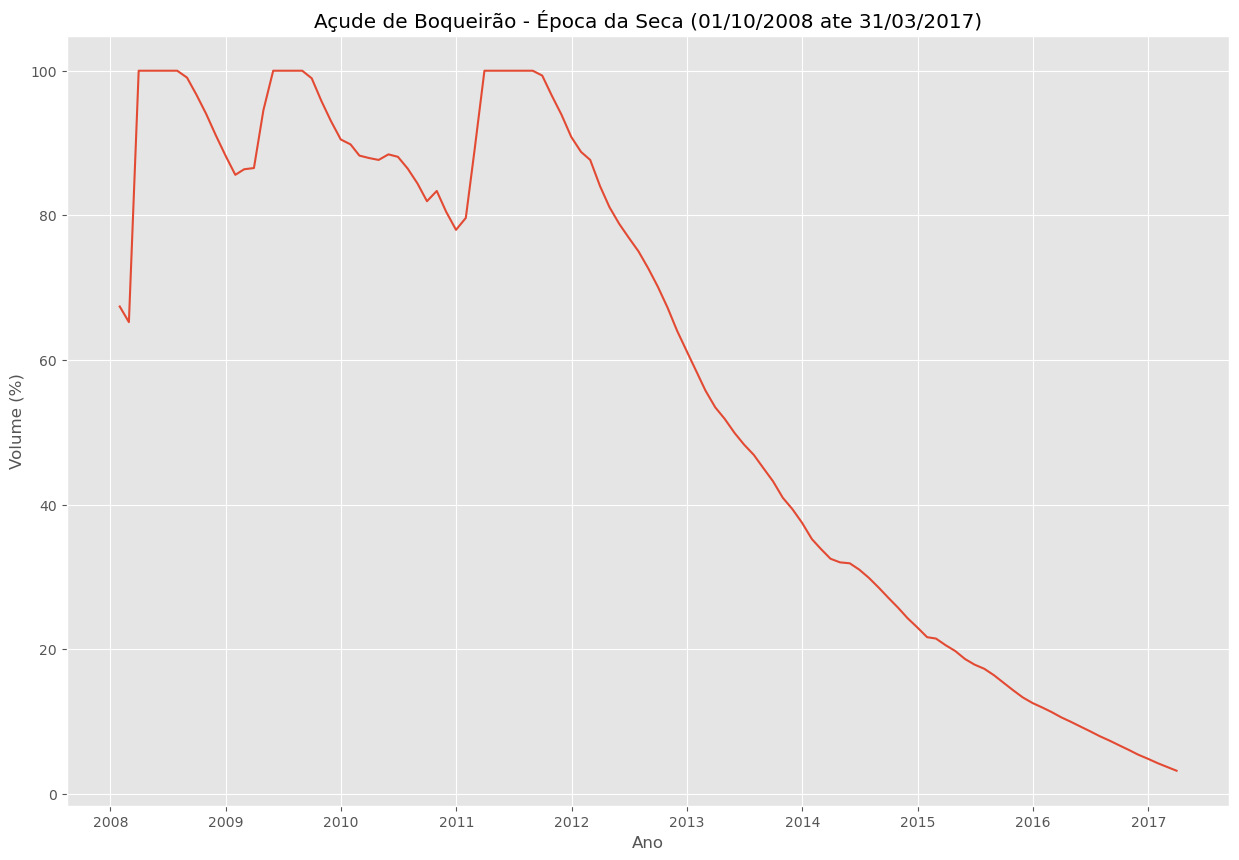

In [21]:
import matplotlib, matplotlib.pyplot as plt

matplotlib.style.use("ggplot")
plt.figure(figsize=(15,10))
plt.plot(df2["Volume (%)"])
# adcionando textos
plt.title("Açude de Boqueirão - Época da Seca (01/10/2008 ate 31/03/2017)")
plt.xlabel("Ano")
plt.ylabel("Volume (%)")
#plt.savefig("Boqueirao-seca.pdf")
plt.show()

In [22]:
print(list(range(1,10)))

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [24]:
len(df2)

111

In [25]:
df2.head()

,Volume (%)
Data do registro,
2008-01-31,67.39
2008-02-29,65.23
2008-03-31,100.00
2008-04-30,100.00
2008-05-31,100.00


In [26]:
df3 = df2['Volume (%)'].reset_index()
df3.head()

,Data do registro,Volume (%)
0,2008-01-31,67.39
1,2008-02-29,65.23
2,2008-03-31,100.00
3,2008-04-30,100.00
4,2008-05-31,100.00


In [27]:
# criar uma coluna com os meses
df4 = df3.copy()
numero_de_medicoes = len(df4)
df4["mes"] = range(1,numero_de_medicoes+1)

df4 = df4[ [ 'Data do registro', 'mes', 'Volume (%)' ]  ].copy()
df4.head()

,Data do registro,mes,Volume (%)
0,2008-01-31,1,67.39
1,2008-02-29,2,65.23
2,2008-03-31,3,100.00
3,2008-04-30,4,100.00
4,2008-05-31,5,100.00


In [28]:
len(df4) # numero de tuplas ou linhas ou medições

111

In [29]:
df4.tail()

,Data do registro,mes,Volume (%)
106,2016-11-30,107,5.39
107,2016-12-31,108,4.82
108,2017-01-31,109,4.21
109,2017-02-28,110,3.72
110,2017-03-31,111,3.18


## Preparar os dados para aplicar o modelo de regressao

In [30]:
import warnings
warnings.filterwarnings('ignore')

import numpy, pandas as pd
import sklearn.linear_model as lm

olm = lm.LinearRegression()

X = df4['mes'].values.reshape(-1, 1)
y = df4["Volume (%)"].values

In [31]:
X[:5]

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [32]:
X.shape

(111, 1)

In [33]:
y[:5]

array([ 67.39,  65.23, 100.  , 100.  , 100.  ])

## Aplicar o modelo de Regressao

In [34]:
olm.fit(X, y) #, epochs=100, learning_rate=0.001, momentum=0.8, optimizer='SGD') HIPERPARAMETROS
olm

LinearRegression()

## Métrica para avaliar o modelo
### R² - coeficiente de determinação.
É uma métrica que mede os o quanto dos futuros examplos são previstos corretamente. <br />
Varia entre 0 e 1. Quanto mais o R² se aproximar de 1, melhor a previsão. <br />
Um R² próximo de 0, não reflete o modelo.

In [35]:
# Predict values
from sklearn.metrics import r2_score

y_pred = olm.predict(df4['mes'].values.reshape(-1,1))

df4['Volume_previsto'] = y_pred

df4.head()

,Data do registro,mes,Volume (%),Volume_previsto
0,2008-01-31,1,67.39,114.26
1,2008-02-29,2,65.23,113.26
2,2008-03-31,3,100.00,112.25
3,2008-04-30,4,100.00,111.25
4,2008-05-31,5,100.00,110.25


In [36]:
df4['Erro'] = abs(df4['Volume_previsto'] - df4['Volume (%)'])

df4.head()

,Data do registro,mes,Volume (%),Volume_previsto,Erro
0,2008-01-31,1,67.39,114.26,46.87
1,2008-02-29,2,65.23,113.26,48.03
2,2008-03-31,3,100.00,112.25,12.25
3,2008-04-30,4,100.00,111.25,11.25
4,2008-05-31,5,100.00,110.25,10.25


In [37]:
df4['Erro'].sum()

1000.1478822393825

In [38]:
# Evaluate the model
r2 = r2_score(y, y_pred)
print('r2 = ', r2 )

r2 =  0.8626375365209323


### A reta de regressao

In [39]:
olm

LinearRegression()

In [40]:
a = olm.coef_[0]
b = olm.intercept_
print(' y = {0} * x + {1}'.format(a, b))

 y = -1.0028793436293435 * x + 115.26169369369369


In [41]:
df4.tail()

,Data do registro,mes,Volume (%),Volume_previsto,Erro
106,2016-11-30,107,5.39,7.95,2.56
107,2016-12-31,108,4.82,6.95,2.13
108,2017-01-31,109,4.21,5.95,1.74
109,2017-02-28,110,3.72,4.94,1.22
110,2017-03-31,111,3.18,3.94,0.76


In [42]:
x1 = 111
y_prev = -1.0028793436293435 * x1 + 115.26169369369369
y_prev

3.9420865508365637

In [43]:
x1

111

In [44]:
# Previsao com o modelo - Método Predict
import numpy as np

x1 = np.array(x1).reshape(-1, 1)
x1

array([[111]])

In [45]:
olm.predict(x1)[0]

3.9420865508365637

# Solução Algébrica

In [46]:
%%latex
$\beta_0 = \overline{y} - \beta_1 \overline{x}$

<IPython.core.display.Latex object>

In [47]:
%%latex
$ \beta_1 = \dfrac{ \sum{(x_i - \overline{x}) ((y_i - \overline{y}))}}{\sum{((x_i - \overline{x})^2} } $

<IPython.core.display.Latex object>

In [48]:
df4.head()

,Data do registro,mes,Volume (%),Volume_previsto,Erro
0,2008-01-31,1,67.39,114.26,46.87
1,2008-02-29,2,65.23,113.26,48.03
2,2008-03-31,3,100.00,112.25,12.25
3,2008-04-30,4,100.00,111.25,11.25
4,2008-05-31,5,100.00,110.25,10.25


In [49]:
x_media = df4['mes'].mean()
x_media

56.0

In [50]:
y_media = df4['Volume (%)'].mean()
y_media

59.10045045045045

In [51]:
import numpy as np

In [52]:
%%latex
$\beta_0 = \overline{y} - \beta_1 \overline{x}$

<IPython.core.display.Latex object>

In [53]:
%%latex
$ \beta_1 = \dfrac{ \sum{(x_i - \overline{x}) ((y_i - \overline{y}))}}{\sum{((x_i - \overline{x})^2} } $

<IPython.core.display.Latex object>

In [54]:
b1 = np.sum((df4['mes'] - x_media) * (df4['Volume (%)'] - y_media)) / np.sum((df4['mes'] - x_media)**2)
b1

-1.0028793436293435

In [55]:
b0 = y_media - b1*x_media
b0

115.26169369369369

In [56]:
print('Modelo Algébrico')
print(' y = {0} * x + {1}'.format(b1, b0))

Modelo Algébrico
 y = -1.0028793436293435 * x + 115.26169369369369


In [57]:
print('Pacote do scikitlearn')
a = olm.coef_[0]
b = olm.intercept_
print(' y = {0} * x + {1}'.format(a, b))

Pacote do scikitlearn
 y = -1.0028793436293435 * x + 115.26169369369369


## Predict

In [58]:
df4.tail()

,Data do registro,mes,Volume (%),Volume_previsto,Erro
106,2016-11-30,107,5.39,7.95,2.56
107,2016-12-31,108,4.82,6.95,2.13
108,2017-01-31,109,4.21,5.95,1.74
109,2017-02-28,110,3.72,4.94,1.22
110,2017-03-31,111,3.18,3.94,0.76


In [59]:
df4[-1:]

,Data do registro,mes,Volume (%),Volume_previsto,Erro
110,2017-03-31,111,3.18,3.94,0.76


In [60]:
df4[-1:]['Volume (%)'].values[0]

3.18

In [61]:
y = volume_observado = 3.18
y

3.18

## modelo 1 - Método Predict do pacote scikitlearn

In [62]:
x1 = np.array(x1).reshape(-1, 1)
x1

array([[111]])

In [63]:
olm.predict(x1)[0]

3.9420865508365637

In [64]:
print('erro:')
olm.predict(x1)[0] - volume_observado

erro:


0.7620865508365635

## modelo 2 - os pesos do pacote scikitlearn

In [65]:
a = olm.coef_[0]
b = olm.intercept_
print(' y_pred2 = {0} * x + {1}'.format(a, b))

 y_pred2 = -1.0028793436293435 * x + 115.26169369369369


In [66]:
y_pred2 = a * x1 + b 
y_pred2[0][0]

3.9420865508365637

In [67]:
print('erro:')
y_pred2[0][0] - volume_observado

erro:


0.7620865508365635

## modelo 3 - Usar a abordagem algébrica

In [68]:
print('Modelo Algébrico')
print(' y = {0} * x + {1}'.format(b1, b0))

Modelo Algébrico
 y = -1.0028793436293435 * x + 115.26169369369369


In [69]:
y_pred3 = b1 * x1 + b0 
y_pred3[0][0]

3.9420865508365637

In [70]:
print('erro:')
y_pred3[0][0] - volume_observado

erro:


0.7620865508365635

## comparar os 2 modelos

In [71]:
erro = y_pred2 - y_pred3
e = erro[0][0]
e

0.0

In [72]:
print('{:.20f}'.format(e))

0.00000000000000000000


## Plota os dados Previstos e Observados

In [ ]:
#print(X)

In [73]:
df4.head()

,Data do registro,mes,Volume (%),Volume_previsto,Erro
0,2008-01-31,1,67.39,114.26,46.87
1,2008-02-29,2,65.23,113.26,48.03
2,2008-03-31,3,100.00,112.25,12.25
3,2008-04-30,4,100.00,111.25,11.25
4,2008-05-31,5,100.00,110.25,10.25


Equação: y = -1.0028793436293435 * x + 115.26169369369369


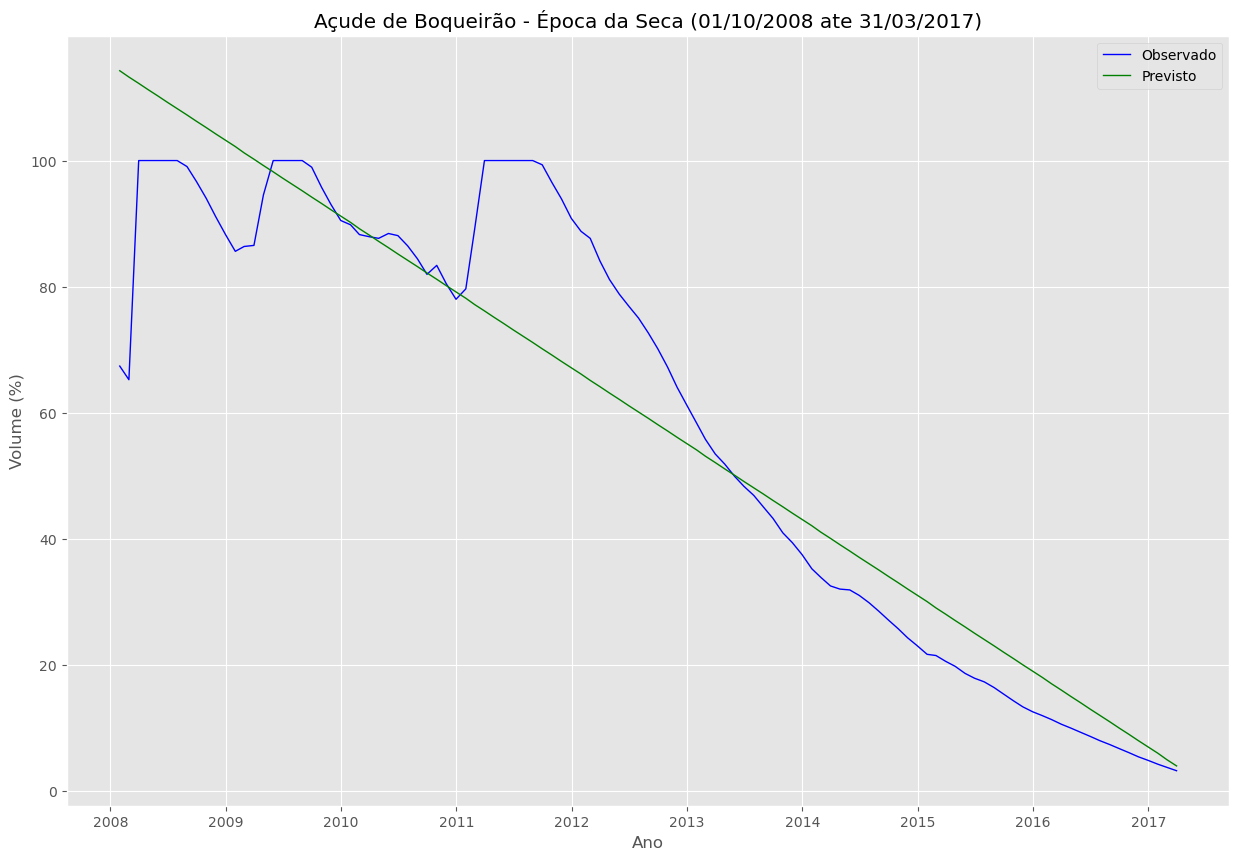

In [74]:
# Plot outputs
matplotlib.style.use("ggplot")
plt.figure(figsize=(15,10))

y = df4["Volume (%)"].values
k = X - 1
k = k.ravel()
plt.plot(df4.loc[k, 'Data do registro'], y, color='blue', linewidth=1)

y_pred = olm.predict(df4['mes'].values.reshape(-1,1))

plt.plot(df4.loc[k, 'Data do registro'],y_pred, color='green',
         linewidth=1)

# Add decorations
plt.title("Açude de Boqueirão - Época da Seca (01/10/2008 ate 31/03/2017)")
plt.xlabel("Ano")
plt.ylabel("Volume (%)")
plt.legend(["Observado", "Previsto",], loc="upper right")

print('Equação: y = {0} * x + {1}'.format(a, b))
plt.show()

## predição futura

In [75]:
numero_de_meses_medicao = len(X)
numero_de_meses_medicao

111

In [76]:
import numpy as np
numero_de_meses_medicao = np.array(numero_de_meses_medicao).reshape(1, -1)
numero_de_meses_medicao

array([[111]])

In [77]:
numero_de_meses_medicao.shape

(1, 1)

In [78]:
# predicao para 30 dias - 1 mes de medicao
#numero_de_meses_medicao = np.array(numero_de_meses_medicao).reshape(1, -1)
pred = olm.predict(numero_de_meses_medicao+1)[0]
print ("Volume Boqueirão depois de um mes = %6.2f %%" % (pred))

Volume Boqueirão depois de um mes =   2.94 %


In [79]:
# predicao para 60 dias - 2 meses
numero_de_meses_medicao = np.array(numero_de_meses_medicao).reshape(1, -1)
pred = olm.predict(numero_de_meses_medicao+2)[0]
print ("Volume Boqueirão depois de 2 meses = %6.2f %%" % (pred))

Volume Boqueirão depois de 2 meses =   1.94 %


## predição até acabar a água

In [80]:
df4.head()

,Data do registro,mes,Volume (%),Volume_previsto,Erro
0,2008-01-31,1,67.39,114.26,46.87
1,2008-02-29,2,65.23,113.26,48.03
2,2008-03-31,3,100.00,112.25,12.25
3,2008-04-30,4,100.00,111.25,11.25
4,2008-05-31,5,100.00,110.25,10.25


In [81]:
df4.tail()

,Data do registro,mes,Volume (%),Volume_previsto,Erro
106,2016-11-30,107,5.39,7.95,2.56
107,2016-12-31,108,4.82,6.95,2.13
108,2017-01-31,109,4.21,5.95,1.74
109,2017-02-28,110,3.72,4.94,1.22
110,2017-03-31,111,3.18,3.94,0.76


In [ ]:
numero_de_meses_medicao

In [82]:
numero_de_meses_medicao = np.array(numero_de_meses_medicao).reshape(1, -1)
print("Última observação: 31 de Março de 2017: 3.18% - Volume")
print("Erro de Previsão (mês de Março) : Previsto - Observado = ", \
      "{:.2f}".format(olm.predict(numero_de_meses_medicao)[0] - 3.18) )

print ("\nPrevisão do Volume Boqueirão até Secar - Ano 2017")
meses = 0
nome_meses = [ "Março", "Abril", "Maio", "Junho", "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro", "Janeiro", "Fevereiro"]
while (True):
    pred = olm.predict(numero_de_meses_medicao+meses)[0]
    if pred < 0:
        break
    if pred > 100:
        break
    print ("Volume Boqueirão - Mês de %s -> %-5.2f%%" % (nome_meses[meses],pred))
    meses = meses + 1
   # print(meses)
pred = olm.predict(numero_de_meses_medicao+meses)[0]
print ("Volume Boqueirão - Mês de %s  -> %-5.2f%%" % (nome_meses[meses],pred))

Última observação: 31 de Março de 2017: 3.18% - Volume
Erro de Previsão (mês de Março) : Previsto - Observado =  0.76

Previsão do Volume Boqueirão até Secar - Ano 2017
Volume Boqueirão - Mês de Março -> 3.94 %
Volume Boqueirão - Mês de Abril -> 2.94 %
Volume Boqueirão - Mês de Maio -> 1.94 %
Volume Boqueirão - Mês de Junho -> 0.93 %
Volume Boqueirão - Mês de Julho  -> -0.07%


### Isso indica que, em 2017, se não houvesse a recarga do mês de abril do Rio São Francisco, <br /> o açude de Boqueirão iria SECAR em Julho/2017